# Demonstrate the use of the Elbow Curve method in portfolio management 

1. Choose any SA Equity portfolio - we'll use the Bateleur BCI SA Equity (A1)
2. The objecive is to find the optimal number of assets that this portfolio can hold. 

# Import the necessary packages

In [1]:
import pandas as pd
import numpy as np
import warnings
import yfinance as yf

warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)
pd.options.display.precision = 4
# plt.style.use('seaborn-ticks')

# Download the data

In [14]:
# Date range
start = '2023-12-23'
end = '2024-11-24'

# Tickers of assets
assets = asset_classes = pd.read_csv("asset_classesSatrix40.csv").sort_values(by = ["Assets"])

assets = list(asset_classes["Assets"])

market_index = ['^J433.JO']

all_assets = assets + market_index
all_assets.sort()

# Downloading data
data = yf.download(all_assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = all_assets

[*********************100%***********************]  42 of 42 completed


# Calculate the returns

In [15]:
# Calculating returns

Y = data[all_assets].pct_change().dropna()

display(Y.head())

,ABG.JO,AGL.JO,ANG.JO,ANH.JO,APN.JO,BHG.JO,BID.JO,BTI.JO,BVT.JO,CFR.JO,...,REM.JO,RNI.JO,SBKP.JO,SHP.JO,SLM.JO,SOL.JO,SSW.JO,VOD.JO,WHL.JO,^J433.JO
Date,,,,,,,,,,,,,,,,,,,,,
2023-12-28 00:00:00+00:00,0.0039,-0.0059,-0.0185,0.0094,0.0065,0.0119,-0.0002,0.0036,-0.0021,0.0068,...,0.0007,0.0001,0.0,-0.0066,0.0084,-0.0177,-0.0168,-0.0096,-0.0019,-0.0025
2023-12-29 00:00:00+00:00,0.0074,0.0049,-0.0050,-0.0028,0.0043,-0.0092,0.0091,0.0013,0.0073,0.0055,...,0.0212,0.0068,0.0,0.0093,0.0048,0.0025,-0.0319,-0.0038,0.0070,0.0050
2024-01-02 00:00:00+00:00,-0.0126,-0.0380,-0.0201,-0.0078,-0.0111,-0.0026,-0.0027,0.0006,-0.0070,-0.0218,...,-0.0249,-0.0014,0.0,-0.0038,-0.0098,-0.0134,-0.0040,0.0057,-0.0046,-0.0137
2024-01-03 00:00:00+00:00,-0.0241,-0.0341,-0.0309,0.0063,0.0070,-0.0155,-0.0208,0.0193,-0.0188,-0.0238,...,-0.0198,-0.0226,0.0,-0.0146,-0.0211,-0.0039,-0.0464,-0.0072,-0.0145,-0.0156
2024-01-04 00:00:00+00:00,-0.0056,0.0130,-0.0159,0.0042,0.0066,-0.0026,-0.0052,0.0128,-0.0242,0.0069,...,0.0048,0.0028,0.0,-0.0148,-0.0045,0.0104,-0.0106,-0.0078,-0.0182,-0.0014


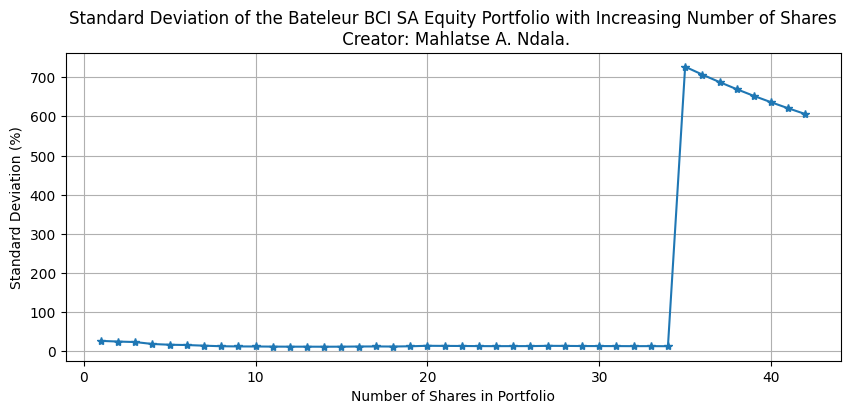

1      26.298
2      24.555
3      23.302
4      18.340
5      16.416
6      15.705
7      14.046
8      12.600
9      12.112
10     11.980
11     11.664
12     11.492
13     11.480
14     11.366
15     11.494
16     11.924
17     12.069
18     11.868
19     12.521
20     13.748
21     13.455
22     13.230
23     12.957
24     12.841
25     12.950
26     12.950
27     13.611
28     13.438
29     13.093
30     13.043
31     12.980
32     12.832
33     12.873
34     12.673
35    727.210
36    707.060
37    688.002
38    669.790
39    652.601
40    636.406
41    620.894
42    606.150
dtype: float64

In [16]:
import matplotlib.pyplot as plt

def calculate_stdev_different_portfolios(data):

    """
    Calculate standard deviation for portfolios with increasing numbers of shares and visualize the results.

    Args:
    shares_symbols (list): A list of shares symbols

    Returns:
    Series: Series containing the standard deviation for portfolios with increasing numbers of shares.
    """

    # Dictionary to hold expected standard deviation of portfolios
    sd = {}

    # Define number of shares in each portfolio
    number_of_shares = np.arange(1, len(Y.columns)+1)

    # Iterate through each portfolio
    for num_shares in number_of_shares:
        # Create equal weights for each constituent in the data
        weights = np.full(num_shares, 1/num_shares)

        # Extract data from whole dataset
        shares_data_subset = Y.iloc[:, :num_shares]

        # Create covariance matrix
        cov_mat = shares_data_subset.cov()

        # Calculate annual covariance matrix
        cov_mat = cov_mat * 252

        # Calculate expected portfolio volatility
        expected_portfolio_variance = weights.T.dot(cov_mat).dot(weights)
        expected_portfolio_std_dev = np.sqrt(expected_portfolio_variance)

        # Store in dictionary
        sd[num_shares] = round(expected_portfolio_std_dev * 100, 3)

    std_dev_of_different_portfolios = pd.Series(sd)

    # Plot standard deviations
    plt.figure(figsize=(10, 4))
    plt.plot(std_dev_of_different_portfolios.index, std_dev_of_different_portfolios.values, marker='*', linestyle='-')
    plt.title('Standard Deviation of the Bateleur BCI SA Equity Portfolio with Increasing Number of Shares\n Creator: Mahlatse A. Ndala.')
    plt.xlabel('Number of Shares in Portfolio')
    plt.ylabel('Standard Deviation (%)')
    plt.grid(True)
    plt.show()

    return std_dev_of_different_portfolios[:57]

#checking the elbow curve
elbow_curve = calculate_stdev_different_portfolios(data)
elbow_curve